In [35]:
#### Nabila Sahli 

In [36]:
import numpy as np

tensor = np.arange(1, 101).reshape((10, 10))
tensor_arr = np.asarray(tensor)
tensor_transpose = tensor_arr.T

submatrix = tensor[1:, 1:]

# Manuelle Berechnung der Strides
row_stride = tensor.strides[0] * 2
col_stride = tensor.strides[1] * 2

# Erstellen der Submatrix mit den gewünschten Strides
submatrix_strided = np.lib.stride_tricks.as_strided(submatrix,
                                                    shape=(9, 9),
                                                    strides=(row_stride, col_stride))

print(tensor)
print(tensor_transpose.base is tensor_arr)  # True
print(submatrix)
print(submatrix_strided.strides)  # (80, 8)
print(submatrix.size)  # 81
print(submatrix.data)  # Speicheradresse des ersten Elements im Tensor


[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
False
[[ 12  13  14  15  16  17  18  19  20]
 [ 22  23  24  25  26  27  28  29  30]
 [ 32  33  34  35  36  37  38  39  40]
 [ 42  43  44  45  46  47  48  49  50]
 [ 52  53  54  55  56  57  58  59  60]
 [ 62  63  64  65  66  67  68  69  70]
 [ 72  73  74  75  76  77  78  79  80]
 [ 82  83  84  85  86  87  88  89  90]
 [ 92  93  94  95  96  97  98  99 100]]
(80, 8)
81


In [10]:
import torch

# Schritt 1: Erstellen einer 10x10 Matrix mit vollem Rang
A = torch.randn(10, 10)
while torch.det(A) == 0:
    A = torch.randn(10, 10)

# Schritt 2: Berechnen der inversen Matrix
A_inv = torch.inverse(A)

# Schritt 3: Multiplizieren der inversen Matrix mit der Ausgangsmatrix
I = torch.mm(A, A_inv)
print('A = ', A)

print('A_inv = ', A_inv)

# Schritt 4: Überprüfen, ob das Ergebnis die Einheitsmatrix ist
if torch.allclose(I, torch.eye(10)):
    print("Das Ergebnis ist die Einheitsmatrix.")
else:
    print("Das Ergebnis ist nicht die Einheitsmatrix.")
    


A =  tensor([[ 0.7615,  1.0293,  1.4335, -0.3627,  0.8155, -0.9068, -0.2063,  0.8523,
         -0.2422, -0.5233],
        [-0.1869,  1.1667, -0.6319, -1.0878,  0.2018,  1.1787, -0.0365,  0.3910,
          0.7229, -0.9963],
        [-0.3789,  1.9714,  1.1763, -0.7262,  0.4309, -0.3463,  2.0561,  0.7248,
          0.4116, -0.3151],
        [ 0.0492,  0.3065, -0.7998, -1.5885, -0.7788,  0.5610, -0.7467,  1.8792,
          1.1609, -1.4853],
        [ 2.4280,  0.3316, -0.4745,  0.1322, -0.0258, -0.8813,  0.7426, -0.2492,
          0.1750, -0.2152],
        [-1.6170,  0.9014, -0.1031, -0.6501, -0.4296, -0.7411, -2.0748, -0.7265,
          1.3349,  0.3446],
        [ 0.5015,  0.3610,  0.1729, -1.1047,  1.8115, -0.5936, -0.3281, -0.9761,
          1.8634,  0.3004],
        [ 1.4061, -1.0933, -0.3485, -1.6704,  1.7526, -1.6724,  1.5705,  1.0779,
         -0.4181, -0.6804],
        [ 0.4294,  0.1193, -0.3549, -0.5538, -0.4733, -0.2705,  1.6806, -0.1529,
         -0.1137,  1.1841],
        [-1.04

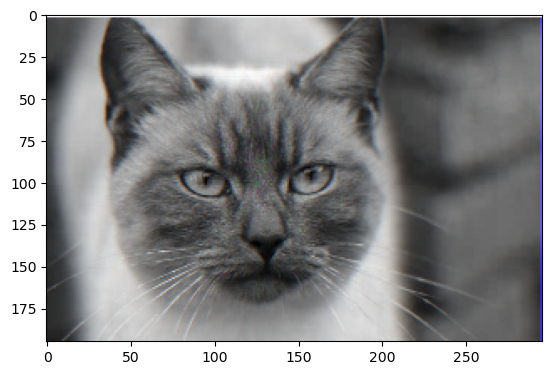

In [34]:
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt


# Laden des Bildes und Konvertieren in ein Numpy-Array
img = Image.open("cat9.png")
img_arr = np.array(img)

# Erstellen eines Ausschnitts mit as_strided und niedriger Auflösung
h, w, c = img_arr.shape
new_h, new_w = h // 2, w // 2
s_h, s_w = img_arr.strides[:2]
new_s_h, new_s_w = s_h * 2, s_w * 2
img_crop = np.lib.stride_tricks.as_strided(img_arr, shape=(new_h, new_w, c), strides=(new_s_h, new_s_w, s_w))

# Konvertieren des Ausschnitts in einen Tensor
img_tensor = torch.tensor(img_crop)

# Speichern des Ausschnitts als Bild
img_crop = Image.fromarray(img_crop.astype(np.uint8))
img_crop.save("cat_crop.png")

img = plt.imread("cat_crop.png")
img = Image.open("cat_crop.png").convert('RGB')

# Anzeigen des Bildes
plt.imshow(img)
plt.show()

